In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [164]:
df = pd.read_csv("/content/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [165]:
df.size

6912

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [167]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [168]:
df.shape

(768, 9)

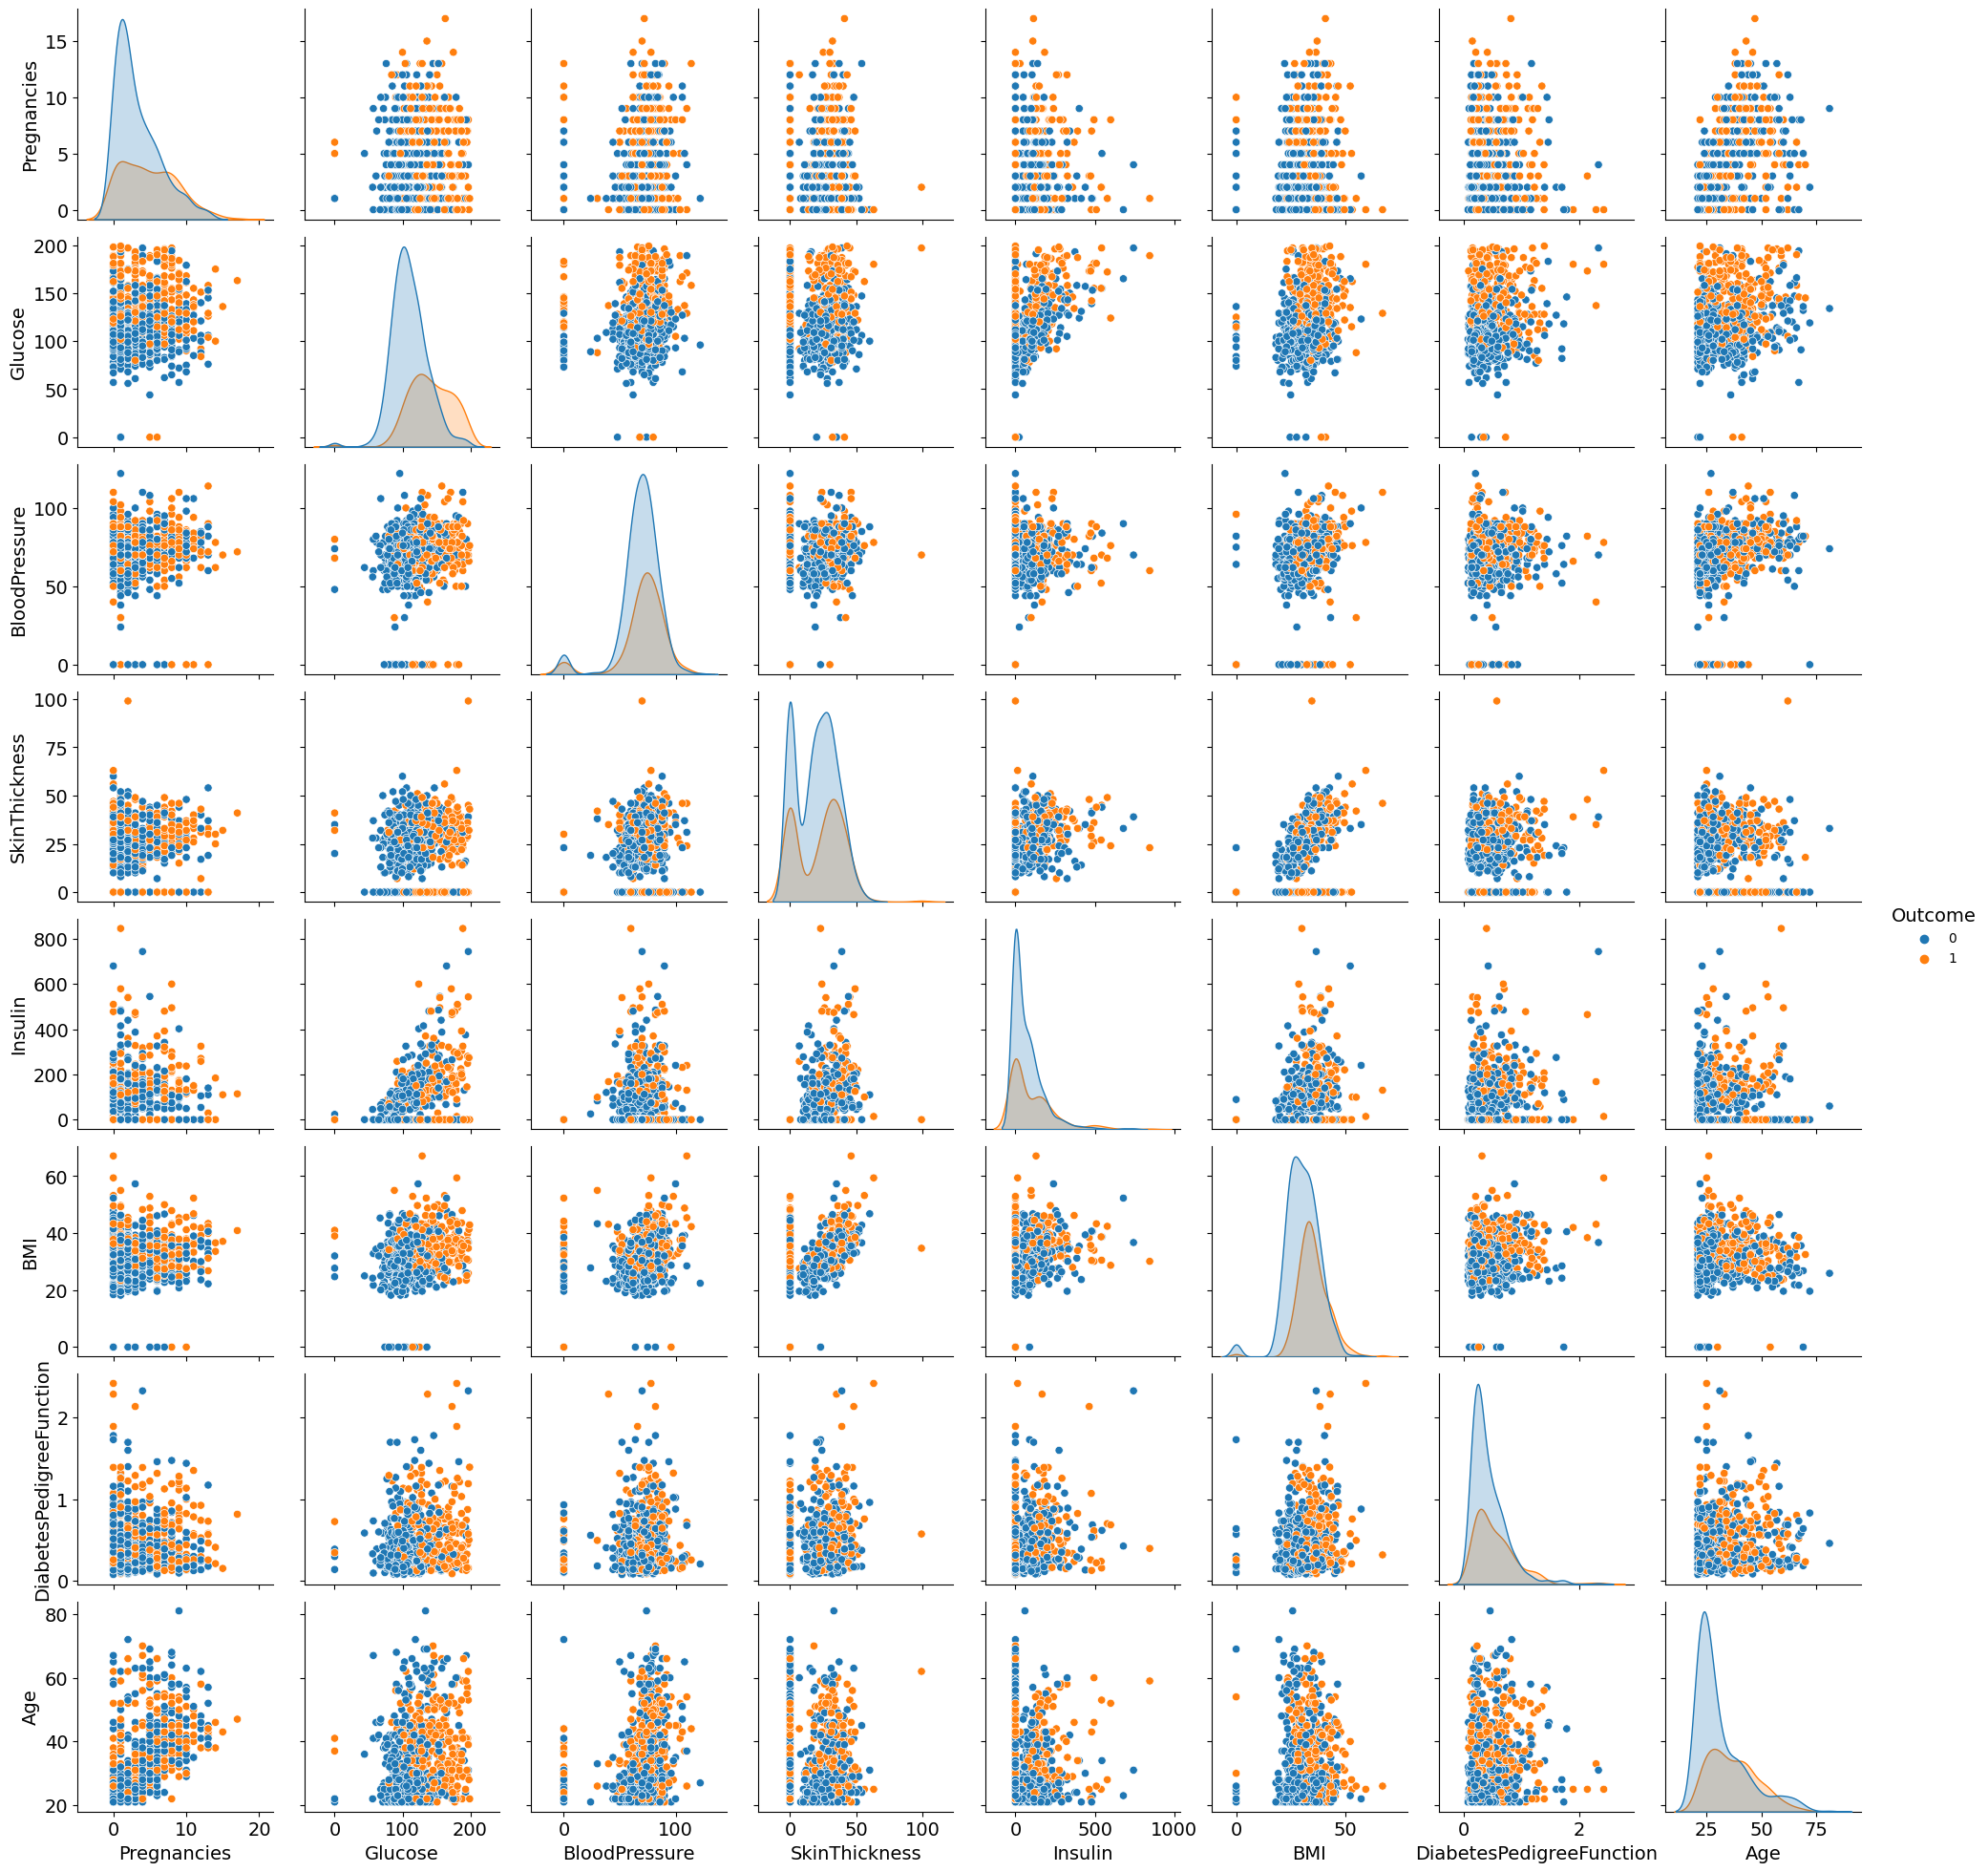

In [169]:
# view dataset corr
import seaborn as sns
sns.pairplot(df, hue = "Outcome")
plt.show()

In [170]:
# check outcome data in bar graph
sns.countplot(x="Outcome", data=df) # imbalance dataset

<Axes: xlabel='Outcome', ylabel='count'>

In [171]:
# check all insulin column

zero_Insulin = 0
zero_Outcome_Insulin = 0
one_Outcome_Insulin = 0

for i in range(len(df["Insulin"])):
    if (df["Insulin"][i] == 0):
        zero_Insulin += 1
        if(df["Outcome"][i] == 0):
            zero_Outcome_Insulin += 1
        if(df["Outcome"][i] == 1):
            one_Outcome_Insulin += 1
            
print("The number of zero insulin values for all Outcome: ", zero_Insulin)
print("The number of zero insulin values for zero Outcome: ", zero_Outcome_Insulin)
print("The number of zero insulin values for one Outcome: ", one_Outcome_Insulin)


The number of zero insulin values for all Outcome:  374
The number of zero insulin values for zero Outcome:  236
The number of zero insulin values for one Outcome:  138


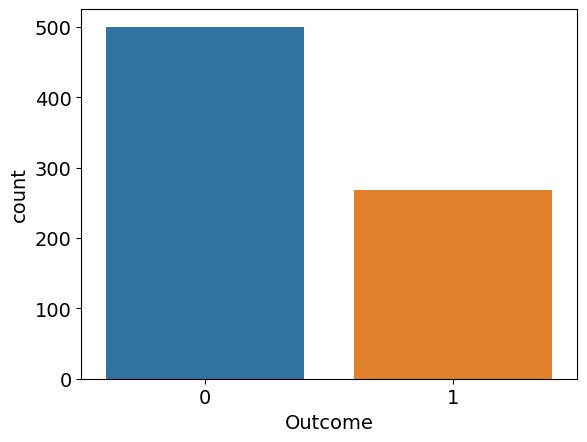

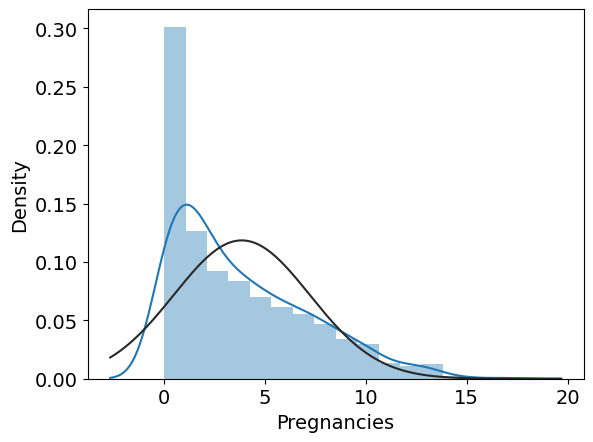

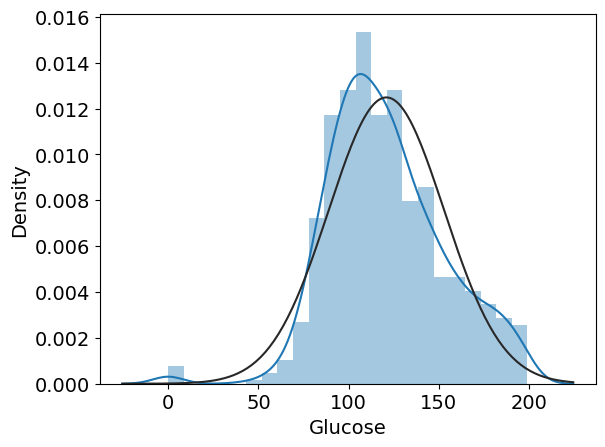

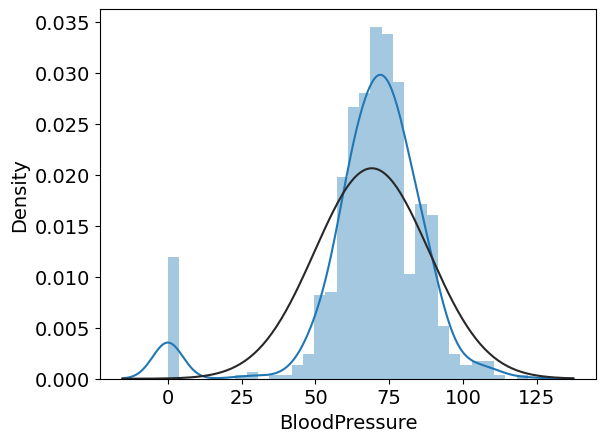

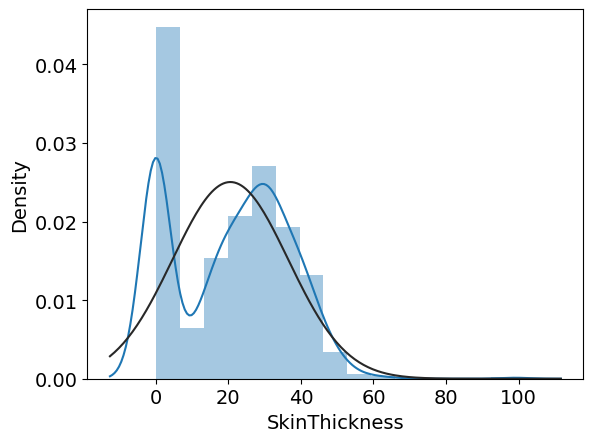

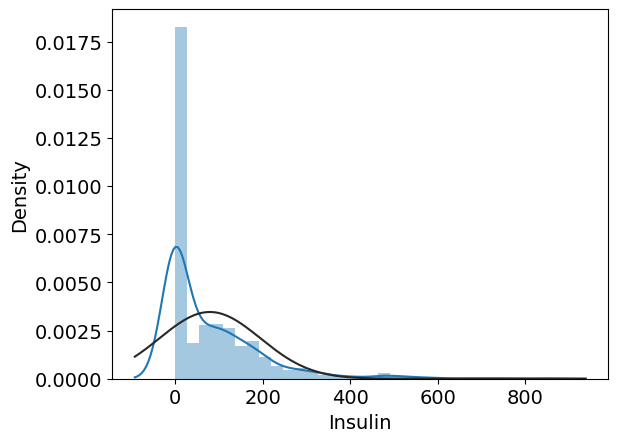

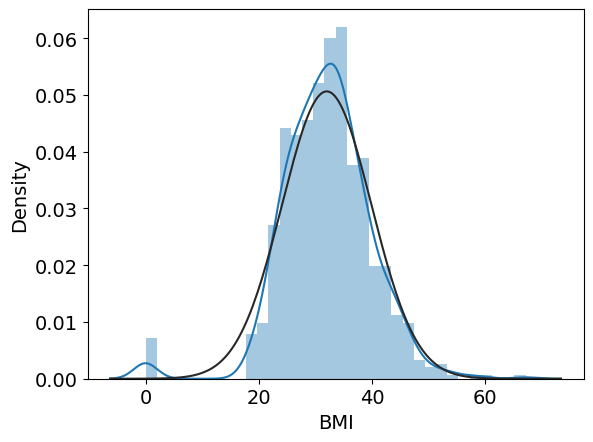

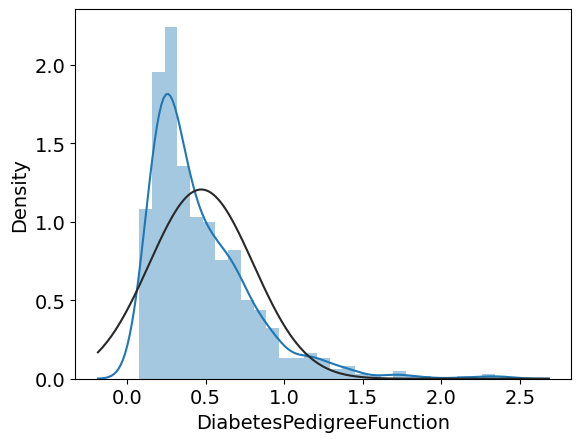

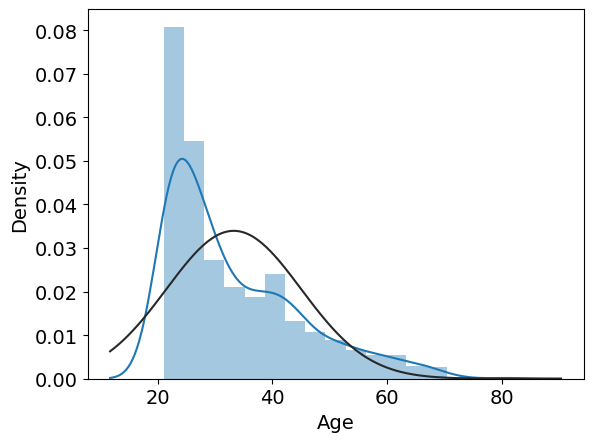

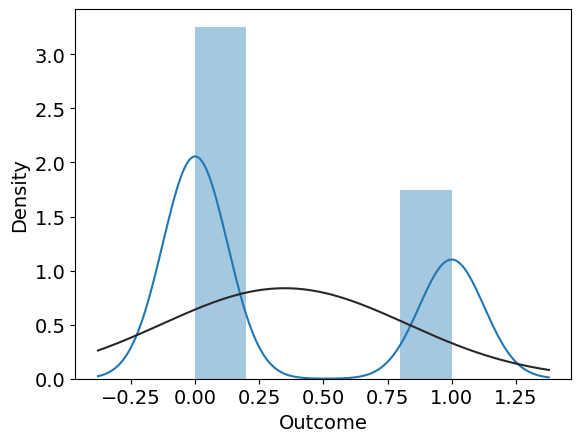

In [172]:
# feature engineering

for i in df.columns:
    plt.figure()
    sns.distplot(df[i], fit = norm)
    plt.show()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [174]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df['bmi'] = sc.fit_transform(df[['BMI']])
df['MonthlDiabetesPedigreeFunction'] = sc.fit_transform(df[['DiabetesPedigreeFunction']])


In [175]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Using SMote algorithm

In [177]:
# pip install imblearn

In [178]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 0)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 1)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

xtrain_smote, ytrain_smote = sm.fit_resample(X, y)
  
print('After OverSampling, the shape of train_X: {}'.format(xtrain_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(ytrain_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(ytrain_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(ytrain_smote == 0)))

Before OverSampling, counts of label '1': 500
Before OverSampling, counts of label '0': 268 

After OverSampling, the shape of train_X: (1000, 10)
After OverSampling, the shape of train_y: (1000,) 

After OverSampling, counts of label '1': 500
After OverSampling, counts of label '0': 500


In [179]:
ytrain_smote.shape

(1000,)

In [180]:
df_majority_0 = ytrain_smote[(ytrain_smote==0)] 

df_minority_1 = ytrain_smote[(ytrain_smote==1)]  


df_upsampled = pd.concat([df_minority_1, df_majority_0])

In [181]:
sns.countplot(x=df_upsampled)

<Axes: xlabel='Outcome', ylabel='count'>

In [182]:
# Import ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import data split
from sklearn.model_selection import train_test_split

In [183]:
# Set Catboost parameters
parameters = {'depth': 9, 
              'iterations': 30, 
              'learning_rate': 0.01, 
              'logging_level': 'Silent',}

# Set xgboost parameters
params = {'objective': 'binary:logistic',
          'eta': 0.039,
          'max_depth': 2,
          'subsample': 0.8,
          'colsample_bytree': 0.9}

In [184]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000, random_state=1)],
               ['RandomForest :',RandomForestClassifier(max_depth=2, n_estimators=50,oob_score=True,n_jobs = -1,random_state =1)], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier(**params)],
              ]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

results = {'Neural Network': 0,
           'RandomForest': 0,
           'Naive Bayes': 0,
           'KNeighbours': 0,
           'SVM': 0,
           'AdaBoostClassifier': 0,
           'GradientBoostingClassifier': 0,
           'XGB': 0
            }

for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(xtrain_smote, ytrain_smote.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Neural Network : 0.75
RandomForest : 0.734375
Naive Bayes : 0.75
KNeighbours : 0.7083333333333334
SVM : 0.6875
AdaBoostClassifier : 0.828125
GradientBoostingClassifier:  0.890625
XGB : 0.7760416666666666


Voting classifier()

In [185]:
def print_scores(y_true, y_pred):
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [186]:
from sklearn.ensemble import VotingClassifier
clf0 = MLPClassifier(max_iter = 1000, random_state=2)
clf1 = RandomForestClassifier(n_estimators=300,  max_depth=30, min_samples_leaf=1, min_samples_split=3, random_state=2, bootstrap=True, criterion='entropy', n_jobs=-1)
clf2 = AdaBoostClassifier()
clf3 = XGBClassifier(**params)
eclf1 = VotingClassifier(estimators=[('MLP', clf0), ('RandomForest', clf1), ('AdaBoostClassifier', clf2), ('XGBoost', clf3)], voting='soft')
eclf1.fit(xtrain_smote, ytrain_smote)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       123
           1       0.74      0.90      0.81        69

    accuracy                           0.85       192
   macro avg       0.84      0.86      0.84       192
weighted avg       0.86      0.85      0.85       192



In [187]:
print_scores(y_test, predictions)

accuracy:  0.8489583333333334
precision:  0.7380952380952381
recall:  0.8985507246376812
f1_score:  0.8514583863848569


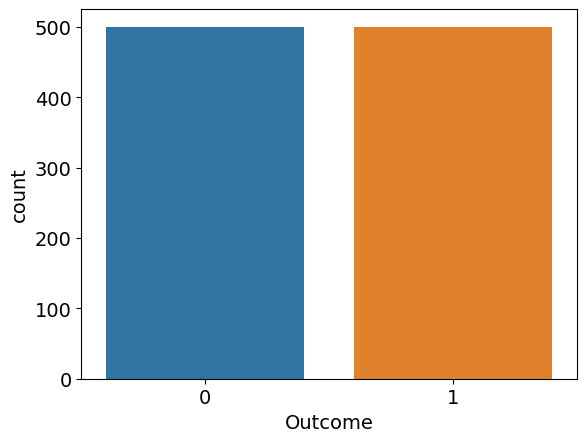

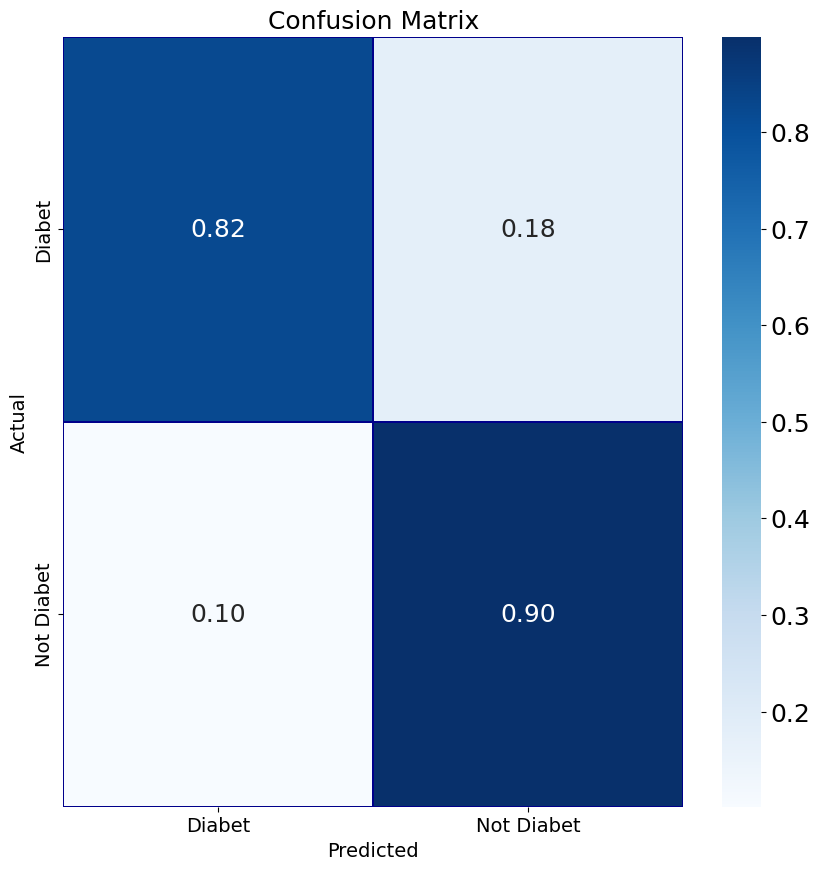

In [188]:
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,10))
plt.rcParams.update({'font.size':18})
sns.heatmap(cmn, 
            xticklabels=['Diabet', 'Not Diabet'],
            yticklabels=['Diabet', 'Not Diabet'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",
            fmt=".2f")
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('ConfMat.png')
plt.show()

In [189]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.8598444680098976

In [190]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

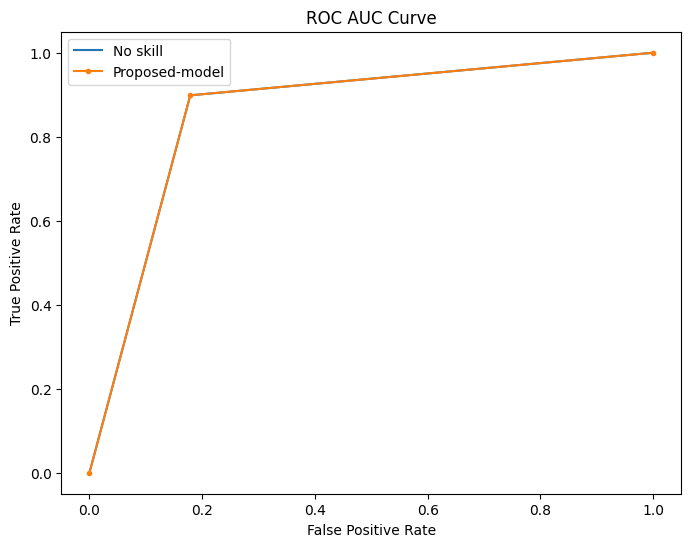

In [191]:
from sklearn.metrics import roc_curve

# y_test, predictions
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, predictions)
lr_auc = roc_auc_score(y_test, predictions)

# calculate the roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, predictions)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(8, 6))
plt.plot(ns_fpr, ns_tpr, linestyle='solid', label='No skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Proposed-model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

Prediction

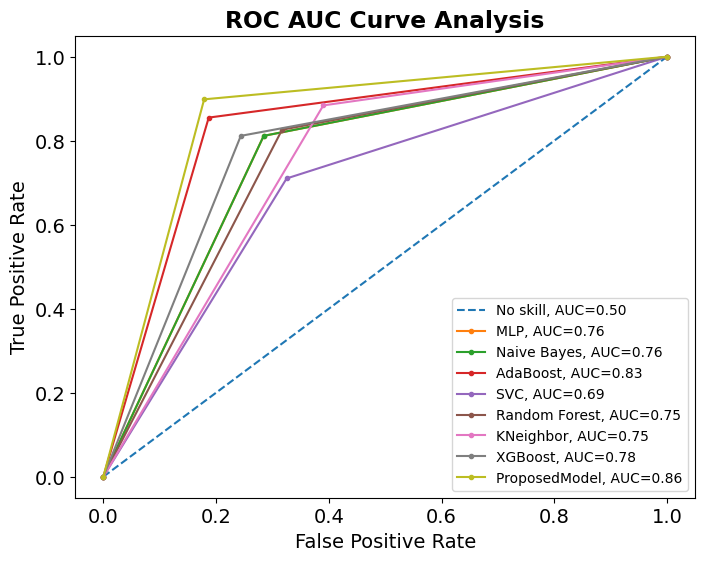

In [192]:
from sklearn.metrics import roc_curve

# from matplotlib import rc

# activate latex text rendering
# rc('text', usetex=True)

# ytest, ypred
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions)
mlp_auc = roc_auc_score(y_test, MLPPred)
gnb_auc = roc_auc_score(y_test, GNBPred)
svc_auc = roc_auc_score(y_test, SVCPred)
rf_auc = roc_auc_score(y_test, RandomPred)
knn_auc = roc_auc_score(y_test, KNNPred)
# cat_auc = roc_auc_score(y_test, CATPred)
xg_auc = roc_auc_score(y_test, XGPred)
# gbc_auc = roc_auc_score(y_test, GBCPred)
ada_auc = roc_auc_score(y_test, ADAPred)


# calculate the roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
lr_fpr_mlp, lr_tpr_mlp, _ = roc_curve(y_test, MLPPred)
lr_fpr_gnb, lr_tpr_gnb, _ = roc_curve(y_test, GNBPred)
lr_fpr_svc, lr_tpr_svc, _ = roc_curve(y_test, SVCPred)
lr_fpr_rf, lr_tpr_rf, _ = roc_curve(y_test, RandomPred)
lr_fpr_knn, lr_tpr_knn, _ = roc_curve(y_test, KNNPred)
lr_fpr_xg, lr_tpr_xg, _ = roc_curve(y_test, XGPred)
#lr_fpr_gbc, lr_tpr_gbc, _ = roc_curve(y_test, GBCPred)
lr_fpr_ada, lr_tpr_ada, _ = roc_curve(y_test, ADAPred)


plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size':14})
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No skill, AUC={ns_auc:.2f}')
plt.plot(lr_fpr_mlp, lr_tpr_mlp, marker='.', label=f'MLP, AUC={mlp_auc:.2f}')
plt.plot(lr_fpr_gnb, lr_tpr_gnb, marker='.', label=f'Naive Bayes, AUC={gnb_auc:.2f}')
# plt.plot(lr_fpr_gbc, lr_tpr_gbc, marker='.', label=f'Gradient Boosting, AUC={gbc_auc:.2f}')
plt.plot(lr_fpr_ada, lr_tpr_ada, marker='.', label=f'AdaBoost, AUC={ada_auc:.2f}')
plt.plot(lr_fpr_svc, lr_tpr_svc, marker='.', label=f'SVC, AUC={svc_auc:.2f}')
plt.plot(lr_fpr_rf, lr_tpr_rf, marker='.', label=f'Random Forest, AUC={rf_auc:.2f}')
plt.plot(lr_fpr_knn, lr_tpr_knn, marker='.', label=f'KNeighbor, AUC={knn_auc:.2f}')
plt.plot(lr_fpr_xg, lr_tpr_xg, marker='.', label=f'XGBoost, AUC={xg_auc:.2f}')
plt.plot(lr_fpr, lr_tpr, marker='.', label=f"ProposedModel, AUC={lr_auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Analysis', fontweight='bold')
plt.rc('legend',fontsize=10)
plt.legend()
plt.savefig('ROC AUC Curve Analysis')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')